In [40]:
#导入pandas，并重命名为pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
# 导入pytorch包
import torch
from torch.utils import data
from d2l import torch as d2l
from torch import nn
# 设置显示中文字体
plt.rcParams["font.sans-serif"] = ["SimHei"]

In [41]:
# 数据预处理
#导入数据表
#导入 covid.test 表
covid_test = pd.read_csv('data/COVID_19/covid.test.csv', sep = ',')
#导入 covid.train 表
covid_train = pd.read_csv('data/COVID_19/covid.train.csv', sep = ',')


In [42]:
# 去除id列
covid_train1 = covid_train.drop('id',axis=1)
# 去除id列
test1 = covid_test.drop(['id'], axis=1)
test1

,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,...,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,52.071090,8.624001,29.374792,5.391413,2.754804,19.695098,13.685645,24.747837,66.194950,44.873473
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.742461,21.720187,41.375784,9.450179,3.150088,22.075715,17.302077,23.559622,57.015009,38.372829
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.109045,20.123959,40.072556,8.781522,2.888209,23.920870,18.342506,24.993341,55.291498,38.907257
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.442267,16.083529,36.977612,5.199286,2.575347,21.073800,12.087171,18.608723,67.036197,43.142779
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.588783,19.503010,42.631236,11.549771,8.530551,15.896575,11.781634,15.065228,61.196518,43.574676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.762931,21.494159,44.202567,14.996865,2.291745,17.740003,12.822676,18.123344,60.417531,37.156229
889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.888461,16.770893,37.373472,7.169675,2.631595,20.587449,15.960166,23.710310,58.758735,38.673787
890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,57.589848,16.761311,36.874822,11.046907,1.912310,16.800220,13.280423,22.423640,60.934851,43.122513
891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.966384,22.696669,45.350415,20.343487,2.385330,16.528265,15.092539,17.476063,54.862386,44.016255


In [43]:
train = covid_train1.drop(['tested_positive.2'], axis=1)
target = covid_train['tested_positive.2']
train

,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,...,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.434539,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.024517,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.116842,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.294809,22.576992,42.954574,15.544373,1.578030,15.295650,12.218123,16.045504,52.446223,42.907472
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.664482,22.091433,43.290957,15.214655,1.641667,14.778802,12.417256,16.134238,52.560315,43.321985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.024971,15.090116,30.839219,7.849525,1.760094,14.617563,11.163213,18.742673,68.024690,38.920206
2696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.885129,14.779264,30.617100,7.754800,1.780730,14.513419,11.281241,18.539741,67.855755,39.224244
2697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.056772,14.961085,30.595194,7.744075,1.921828,14.160990,11.163526,18.702564,67.731162,38.740651
2698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.620924,14.609582,30.420998,7.687974,1.992580,14.409427,11.330301,19.134697,67.795100,38.595125


#### 特征值选取

In [44]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression
# from sklearn.model_selection import train_test_split

In [45]:
# bestfeatures = SelectKBest(score_func=f_regression, k=30)
# fit = bestfeatures.fit(train,target)
# train_scores = pd.DataFrame(fit.scores_)
# train_columns = pd.DataFrame(train.columns)
# featureScores = pd.concat([train_columns,train_scores],axis=1)
# featureScores.columns = ['Specs','Score'] 
# # 按照分数排序
# featureScores = featureScores.sort_values(by='Score', ascending=False)
# featureScores.describe()

In [46]:
# # 选取前30
# bestfeatures = SelectKBest(score_func=f_regression, k=30)
# fit = bestfeatures.fit(train,target)
# cols = bestfeatures.get_support(indices=True)
# cols

In [47]:
# train = train.iloc[:,cols]
# # 去除MA列
# train1 = train.drop('MA',axis=1)
# test2 = test1.iloc[:,cols]
# # 去除MA列
# test3 = test2.drop('MA',axis=1)

In [48]:
train1.shape

(2700, 93)

In [49]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# 创建StandardScaler对象
scaler = StandardScaler()
# 对数据进行标准化处理
train1 = scaler.fit_transform(train)
train1
# 对数据进行标准化处理
test4 = scaler.fit_transform(test1)
test4

array([[-0.16259392, -0.15892868, -0.16259392, ...,  2.05110099,
         0.27716307,  0.10036909],
       [-0.16259392, -0.15892868, -0.16259392, ...,  1.60871603,
        -1.33826122, -1.3119887 ],
       [-0.16259392, -0.15892868, -0.16259392, ...,  2.14250478,
        -1.64155313, -1.19587641],
       ...,
       [-0.16259392, -0.15892868, -0.16259392, ...,  1.18577773,
        -0.64847373, -0.28005199],
       [-0.16259392, -0.15892868, -0.16259392, ..., -0.65625711,
        -1.7170654 , -0.08587364],
       [-0.16259392, -0.15892868, -0.16259392, ...,  0.73657275,
         0.39608821, -1.408013  ]])

In [50]:
X,y = torch.tensor(train1),torch.tensor(target)
print(X,y,sep='\n')

tensor([[ 6.2689, -0.1595, -0.1595,  ..., -0.9385, -1.7435, -0.1843],
        [ 6.2689, -0.1595, -0.1595,  ..., -1.0105, -1.7123, -0.3637],
        [ 6.2689, -0.1595, -0.1595,  ..., -1.0968, -1.8005, -0.3051],
        ...,
        [-0.1595, -0.1595, -0.1595,  ..., -0.1997,  0.4658, -1.1141],
        [-0.1595, -0.1595, -0.1595,  ..., -0.0401,  0.4761, -1.1419],
        [-0.1595, -0.1595, -0.1595,  ...,  0.0194,  0.5547, -1.1689]],
       dtype=torch.float64)
tensor([20.7049, 21.2929, 21.1667,  ..., 12.6134, 12.4772, 11.8117],
       dtype=torch.float64)


In [51]:
# 切割数据样本 20%验证集；80%训练集
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2,random_state=42)
#检查训练集和验证集中样本的形态
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([2160, 93]),
 torch.Size([540, 93]),
 torch.Size([2160]),
 torch.Size([540]))

In [52]:
X_train = torch.tensor(X_train,dtype=torch.float)
y_train = torch.tensor(y_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)
test4 = torch.tensor(test4,dtype=torch.float)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10252\2710318108.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train,dtype=torch.float)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10252\2710318108.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.float32)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10252\2710318108.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test,dtype=torch.float32)
C:\Users\Administrator\AppDat

In [53]:
# 转换样本数据形状为CNN所需的维度
# 第一个维度表示样本数量，
# 第二和第三个维度表示图像的高度和宽度（在这里我们使用1来表示）
# 最后一个维度表示特征数量。
X_train = X_train.reshape(X_train.shape[0], 1, 1, X_train.shape[1])
y_train = y_train.reshape(y_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1, 1, X_test.shape[1])
y_test = y_test.reshape(y_test.shape[0], 1)
# 转换测试集数据形状为CNN所需的维度
test4 = test4.reshape(test4.shape[0], 1, 1, test4.shape[1])
# 查看维度信息
X_train.shape,X_test.shape,y_train.shape,y_test.shape,test4.shape

(torch.Size([2160, 1, 1, 93]),
 torch.Size([540, 1, 1, 93]),
 torch.Size([2160, 1]),
 torch.Size([540, 1]),
 torch.Size([893, 1, 1, 93]))

In [54]:
# 构建卷积神经网络
class CNNModel(nn.Module):
    def __init__(self, input_channels, output_size):
        super(CNNModel, self).__init__()
        # 第一个卷积层：输入通道数为input_channels，输出通道数为16，卷积核大小为(1, 3)
        self.conv1 = nn.Conv2d(input_channels, 16, kernel_size=(1, 3))
        self.relu1 = nn.ReLU()  # 激活函数
        self.maxpool1 = nn.MaxPool2d(kernel_size=(1, 2))  # 最大池化层
        
        # 第二个卷积层：输入通道数为16，输出通道数为32，卷积核大小为(1, 3)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(1, 3))
        self.relu2 = nn.ReLU()  # 激活函数
        self.maxpool2 = nn.MaxPool2d(kernel_size=(1, 2))  # 最大池化层

        self.flatten = nn.Flatten()  # 展平层
        # 第一个全连接层：输入维度为672，输出维度为256
        self.fc1 = nn.Linear(672 , 256)
        self.relu3 = nn.ReLU()  # 激活函数
        # 第二个全连接层：输入维度为256，输出维度为64
        self.fc2 = nn.Linear(256 , 64)
        # 第三个全连接层：输入维度为64，输出维度为1
        self.fc3 = nn.Linear(64 , 1)

    def forward(self, x):
        x = self.conv1(x)  # 第一个卷积层
        x = self.relu1(x)  # 激活函数
        x = self.maxpool1(x)  # 最大池化层
        
        x = self.conv2(x)  # 第二个卷积层
        x = self.relu2(x)  # 激活函数
        x = self.maxpool2(x)  # 最大池化层

        x = self.flatten(x)  # 展平
        x = self.fc1(x)  # 第一个全连接层
        x = self.relu3(x)  # 激活函数
        x = self.fc2(x)  # 第二个全连接层
        x = self.fc3(x)  # 第三个全连接层
        return x

In [55]:
# 定义超参数
# 输入数据的通道维度
input_channels = 1
# 最终输出的维度
output_size = 1
# 学习率
lr = 0.001
# 迭代次数
num_epochs = 10001

In [56]:
# 初始化模型
model = CNNModel(input_channels, output_size)
# 定义损失函数
criterion = nn.MSELoss()
# 设置优化器
optimizer = torch.optim.Adam(model.parameters(), lr)

In [57]:
# 定义存储损失的列表
train_losses = []
train_epochs = []

# 模型训练
for epoch in range(num_epochs):
    inputs = torch.Tensor(X_train)  # 将输入数据转换为torch.Tensor类型
    labels = torch.Tensor(y_train)  # 将标签数据转换为torch.Tensor类型
    
    optimizer.zero_grad()  # 清空优化器的梯度信息，准备进行反向传播和参数更新
    
    outputs = model(inputs)  # 输入数据经过模型得到输出结果
    loss = criterion(outputs.squeeze(), labels.squeeze())  # 计算损失值
    
    loss.backward()  # 反向传播，计算参数的梯度
    optimizer.step()  # 使用优化器更新模型的参数
    
    if (epoch+1) % 100 == 0:
        train_losses.append(loss.item())  # 将当前的损失值添加到train_losses列表中
        train_epochs.append(epoch+1)  # 将当前的训练轮次添加到train_epochs列表中
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')  # 打印当前轮次的损失值

Epoch [100/10001], Loss: 7.3630
Epoch [200/10001], Loss: 3.2681
Epoch [300/10001], Loss: 2.0725
Epoch [400/10001], Loss: 1.5214
Epoch [500/10001], Loss: 1.2064
Epoch [600/10001], Loss: 1.0219
Epoch [700/10001], Loss: 0.8811
Epoch [800/10001], Loss: 0.7695
Epoch [900/10001], Loss: 0.7017
Epoch [1000/10001], Loss: 0.6522
Epoch [1100/10001], Loss: 0.6144
Epoch [1200/10001], Loss: 0.5838
Epoch [1300/10001], Loss: 0.5699
Epoch [1400/10001], Loss: 0.5323
Epoch [1500/10001], Loss: 0.5101
Epoch [1600/10001], Loss: 0.5144
Epoch [1700/10001], Loss: 0.4725
Epoch [1800/10001], Loss: 0.4563
Epoch [1900/10001], Loss: 0.4652
Epoch [2000/10001], Loss: 0.4425
Epoch [2100/10001], Loss: 0.4172
Epoch [2200/10001], Loss: 0.4031
Epoch [2300/10001], Loss: 0.4159
Epoch [2400/10001], Loss: 0.4096
Epoch [2500/10001], Loss: 0.3852
Epoch [2600/10001], Loss: 0.3608
Epoch [2700/10001], Loss: 0.3587
Epoch [2800/10001], Loss: 0.3428
Epoch [2900/10001], Loss: 0.3579
Epoch [3000/10001], Loss: 0.3265
Epoch [3100/10001],

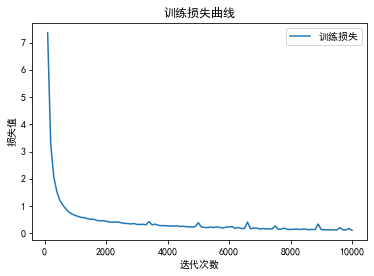

In [58]:
# 绘制损失函数曲线图
plt.plot(train_epochs, train_losses, label='训练损失')
plt.xlabel('迭代次数')
plt.ylabel('损失值')
plt.title('训练损失曲线')
plt.legend()
plt.show()

In [163]:
# 模型预测
test_inputs = torch.Tensor(X_test)
predictions = model(test_inputs).squeeze().detach().numpy()

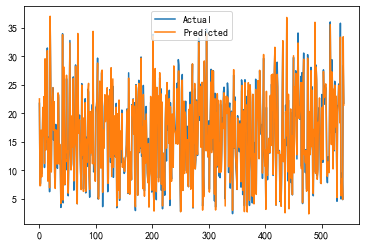

In [164]:
# 可视化分析
plt.plot(y_test.squeeze(), label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [165]:
predictions = model(test4).squeeze().detach().numpy()

In [166]:
predictions

array([19.668873 ,  8.434598 , 10.708077 , 13.104383 ,  4.2547183,
       24.083094 , 23.42541  ,  9.546169 , 11.248472 , 12.109412 ,
       20.088808 , 20.290169 , 22.77393  , 14.8046   , 21.467606 ,
       19.873589 , 30.049393 , 12.32856  , 23.996658 ,  4.5226736,
        8.0774145, 22.234016 , 21.700096 , 17.617393 , 13.81393  ,
       28.330742 , 21.240263 , 28.058035 , 13.273284 , 20.985756 ,
       12.040177 ,  9.866227 , 26.064373 , 12.089115 , 18.584158 ,
       38.13942  , 13.917663 , 10.72149  , 14.871673 , 13.853071 ,
       17.002651 ,  2.413797 , 11.68784  , 22.28408  , 10.190134 ,
       14.26324  , 14.4725895,  3.441207 ,  5.73801  , 21.377254 ,
       16.499184 , 10.353593 , 12.776345 ,  9.812819 , 15.304412 ,
       30.685726 , 13.051032 , 16.486708 , 32.419018 , 10.615436 ,
       17.732065 , 22.595165 , 27.026237 , 24.187637 , 17.915165 ,
        4.762652 , 11.425194 , 20.422075 , 34.841244 , 15.766372 ,
       22.171936 , 15.216602 , 15.9238615, 23.931778 , 13.6108

In [167]:
#导入 sampleSubmission 表
sampleSubmission = pd.read_csv(r'C:\Users\Administrator\Desktop\3-COVID-19\sampleSubmission.csv', sep = ',')
# 创建新表
CNN_sampleSubmission = pd.DataFrame()
CNN_sampleSubmission .to_csv(r'C:\Users\Administrator\Desktop\3-COVID-19\CNN_sampleSubmission.csv', index=False)
# 写入id列
CNN_sampleSubmission["id"] =sampleSubmission["id"]

In [168]:
# 将数据写入特定一列
CNN_sampleSubmission['tested_positive'] = predictions[:len(sampleSubmission)]  # 只写入与数据帧行数相匹配的部分数组数据
# 写回 CSV 文件
CNN_sampleSubmission.to_csv(r'C:\Users\Administrator\Desktop\3-COVID-19\CNN_sampleSubmission.csv', index=False)

In [169]:
CNN_sampleSubmission

,id,tested_positive
0,0,19.668873
1,1,8.434598
2,2,10.708077
3,3,13.104383
4,4,4.254718
...,...,...
888,888,11.441741
889,889,7.910501
890,890,35.760311
891,891,23.813013
